# DATA LOADING

In [1]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv(r'D:\Documents\CODES\CS-THESIS\Practice code\Training Data.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# DATA MODIFICATIONS

In [2]:
df = df [["Score", "Text"]]
df = df.rename({"Text" : "Reviews"}, axis=1)
df.head()

,Score,Reviews
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


# DATA COUNTING

In [3]:
df['Score'].value_counts()

Score
5    642
4    138
1     98
3     75
2     47
Name: count, dtype: int64

In [4]:
df.shape

(1000, 2)

# TEXT CLEANING

In [5]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
len(stop_words)

179

In [6]:
negative_words = {'no', 'not', "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"}
stop_words = set(stop_words)

stop_words -= negative_words
len_stop_words = len(stop_words)

len(stop_words)

160

In [7]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile(r'[^\w\s]')
def text_cleaner(text):

    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = re.split(r'\s+', text.strip())
    cleaned_text = " ".join(word for word in text if word not in stop_words)
    return cleaned_text

In [8]:
print(df.columns)

Index(['Score', 'Reviews'], dtype='object')


# DATA OVERVIEW

In [9]:
df['Reviews'] = df['Reviews'].apply(text_cleaner)
conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['Overview'] = np.select(conditions, values)
df.head()

C:\Users\jeste\AppData\Local\Temp\ipykernel_20456\4127126769.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,Score,Reviews,Overview
0,5,bought several vitality canned dog food produc...,Positive
1,1,product arrived labeled jumbo salted peanuts p...,Negative
2,4,confection around centuries light pillowy citr...,Positive
3,2,looking secret ingredient robitussin believe f...,Negative
4,5,great taffy great price wide assortment yummy ...,Positive


<Axes: xlabel='Overview'>

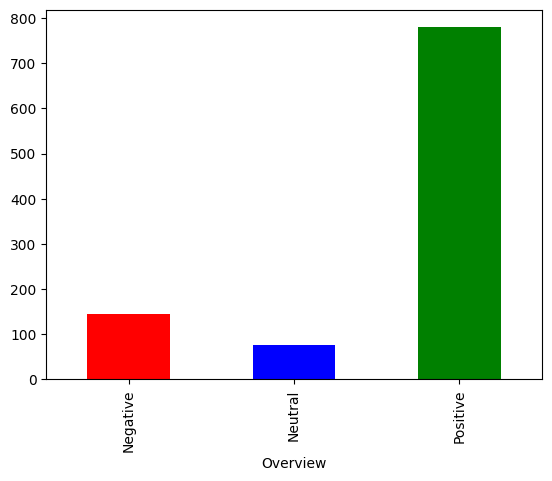

In [10]:
import matplotlib.pyplot as plt
df['Overview'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

# DATASET SPLITTING

In [11]:
x = df['Reviews'].values
y = df['Overview'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [12]:
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([116,  60, 624], dtype=int64))

In [13]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 29,  15, 156], dtype=int64))

# Pipeline 1
    • Vectorization using TFIDF Vectorizer
    • Uing Single SVM Algorithm
    • Model Evaluation

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([
    ('tfidf',TfidfVectorizer()),('model',SVC())
])

text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array(['Negative', 'Positive'], dtype=object), array([  1, 199], dtype=int64))

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_pred, y_test) * 100}")

Accuracy Score: 78.5


In [16]:
confusion_matrix(y_pred,y_test)

array([[  1,   0,   0],
       [  0,   0,   0],
       [ 28,  15, 156]], dtype=int64)

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.03      1.00      0.07         1
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.78      0.88       199

    accuracy                           0.79       200
   macro avg       0.34      0.59      0.32       200
weighted avg       1.00      0.79      0.87       200



C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [18]:
text_model.predict(['This product is stupid!'])

array(['Positive'], dtype=object)

# # Pipeline 2
    • Vectorization using Hashing Vectorizer
    • Using Linear Kernel SVM Algorithm
    • Model Evaluation

In [19]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import LinearSVC
text_model2 = Pipeline([
    ('tfidf', HashingVectorizer(ngram_range=(1, 2))), 
    ('model', LinearSVC())
])

text_model2.fit(x_train,y_train)
y_pred2 = text_model2.predict(x_test)
np.unique(y_pred2,return_counts=True)

C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array(['Negative', 'Positive'], dtype=object), array([ 12, 188], dtype=int64))

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_pred2, y_test) * 100}")

Accuracy Score: 79.0


In [21]:
confusion_matrix(y_pred2,y_test)

array([[  6,   2,   4],
       [  0,   0,   0],
       [ 23,  13, 152]], dtype=int64)

In [22]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

    Negative       0.21      0.50      0.29        12
     Neutral       0.00      0.00      0.00         0
    Positive       0.97      0.81      0.88       188

    accuracy                           0.79       200
   macro avg       0.39      0.44      0.39       200
weighted avg       0.93      0.79      0.85       200



C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [24]:
text_model2.predict(['This product is stupid!'])

array(['Positive'], dtype=object)

# Pipeline 3
    • Vectorization using Hashing Vectorizer
    • Using Bagging Classifier SVM Algorithm
    • Model Evaluation

In [23]:
from sklearn.ensemble import BaggingClassifier

text_model3 = Pipeline([
    ('tfidf', HashingVectorizer(ngram_range=(1, 2))), 
    ('model', BaggingClassifier(base_estimator=SVC(), n_estimators=10))  # Use BaggingClassifier with SVC
])

text_model3.fit(x_train, y_train)
y_pred3 = text_model3.predict(x_test)
np.unique(y_pred3, return_counts=True)

C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


(array(['Positive'], dtype=object), array([200], dtype=int64))

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_pred3, y_test) * 100}")

Accuracy Score: 78.0


In [26]:
confusion_matrix(y_pred3,y_test)

array([[  1,   0,   0],
       [  0,   0,   0],
       [ 28,  15, 156]], dtype=int64)

In [27]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

    Negative       0.03      1.00      0.07         1
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.78      0.88       199

    accuracy                           0.79       200
   macro avg       0.34      0.59      0.32       200
weighted avg       1.00      0.79      0.87       200



C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [35]:
text_model3.predict(['This product is stupid!'])

array(['Positive'], dtype=object)

# Pipeline 4
    • Vectorization using Hashing Vectorizer
    • Using Random Forest Classifier SVM Algorithm
    • Model Evaluation

In [29]:
from sklearn.ensemble import RandomForestClassifier

text_model4 = Pipeline([
    ('tfidf', HashingVectorizer(ngram_range=(1, 2))), 
    ('model', RandomForestClassifier(n_estimators=10))  # Use RandomForestClassifier
])

text_model4.fit(x_train, y_train)
y_pred4 = text_model4.predict(x_test)
np.unique(y_pred4, return_counts=True)

(array(['Positive'], dtype=object), array([200], dtype=int64))

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_pred4, y_test) * 100}")

Accuracy Score: 78.0


In [31]:
confusion_matrix(y_pred4,y_test)

array([[  0,   0,   0],
       [  0,   0,   0],
       [ 29,  15, 156]], dtype=int64)

In [32]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.78      0.88       200

    accuracy                           0.78       200
   macro avg       0.33      0.26      0.29       200
weighted avg       1.00      0.78      0.88       200



C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [34]:
text_model4.predict(['This product is stupid!'])

array(['Positive'], dtype=object)